### Import required modules.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### We create 'numSamples' number of points along a line from 'varMinVal' to 'varMaxVal'

In [2]:
numSamples = 20
noiseRange = 7
varMinVal = 0
varMaxVal = 100
numIter = 100

### Create data using np.linspace and add some noise.

In [3]:
x = np.linspace(varMinVal, varMaxVal, numSamples) + np.random.normal(-1*noiseRange, noiseRange, numSamples)

In [16]:
y = np.linspace(varMinVal, -varMaxVal, numSamples) + np.random.normal(-1*noiseRange, noiseRange, numSamples)

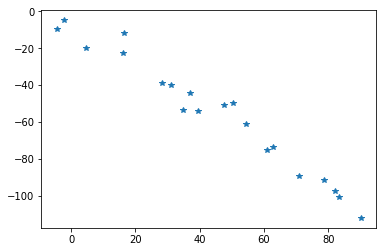

In [17]:
plt.plot(x,y,'*')

### Create tensorflow variables and placeholders. 


### Init the variables with random values.

In [18]:
m = tf.Variable(np.random.randn(1))
c = tf.Variable(np.random.randn(1))

In [19]:
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)

### Make a prediction using line equation and init values on first interation.

In [20]:
y_pred = m*X + c

### Calculate the mean squared error (MSE) between our prediction and actual.

In [21]:
err = tf.square(y_pred-Y)/(2*len(x))

### Create a tensorflow Gradient Descent Optimizer with a low learning rate.


### Set the optimizer to minimize our error function from previous step.

In [22]:
opz = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opz.minimize(err)

### Init the tf variables.

In [23]:
varInit = tf.global_variables_initializer()

### Run the learning for 'iter' number of iterations.

In [24]:
with tf.Session() as sess:
    sess.run(varInit)
    for iter in range(numIter):
        for xpt,ypt in zip(x,y):
            sess.run(train, feed_dict={X:xpt, Y:ypt})
        
    m_final, c_final = sess.run([m,c])

### Print the final slope and y-intercept

In [25]:
print(m_final, c_final)

[-1.22414109] [0.45260162]


### Create a line with learnt values to plot line.

In [26]:
xplt = np.linspace(varMinVal-15, varMaxVal+15, numSamples)
yplt = xplt*m_final + c_final

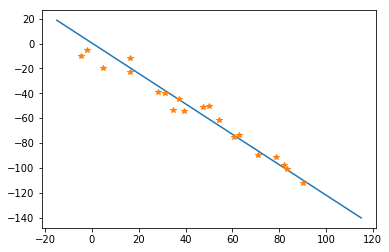

In [27]:
plt.plot(xplt, yplt)
plt.plot(x,y,'*')